<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [6]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

## Demo: How to run an sql query


In [3]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [4]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

,sql
0,"CREATE TABLE ""master"" (\n""index"" INTEGER,\n ""..."


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


       ConvertedComp
11393       130000.0
11394        19880.0
11395       105000.0
11396        80371.0
11397            NaN


<AxesSubplot:ylabel='Frequency'>

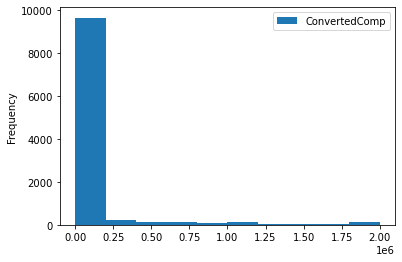

In [14]:
QUERYH = """
SELECT ConvertedComp FROM master
"""

df1 = pd.read_sql_query(QUERYH,conn)
print(df1.tail())
df1.plot(kind='hist')


### Box Plots


Plot a box plot of `Age.`


        Age
11393  36.0
11394  25.0
11395  34.0
11396  25.0
11397  30.0

 Age    287
dtype: int64 



<AxesSubplot:>

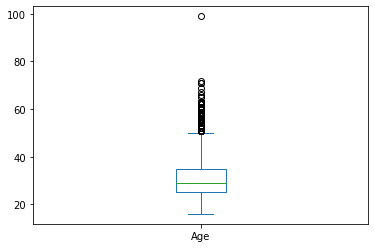

In [18]:
QUERYBx = """
SELECT Age FROM master
"""

df2 = pd.read_sql_query(QUERYBx,conn)
print(df2.tail())
print('\n', df2.isnull().sum(), '\n')
df2.plot(kind='box')



## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


        Age  WorkWeekHrs
11393  36.0         40.0
11394  25.0         40.0
11395  34.0         40.0
11396  25.0         42.5
11397  30.0         80.0

 Age            287
WorkWeekHrs    122
dtype: int64 



<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

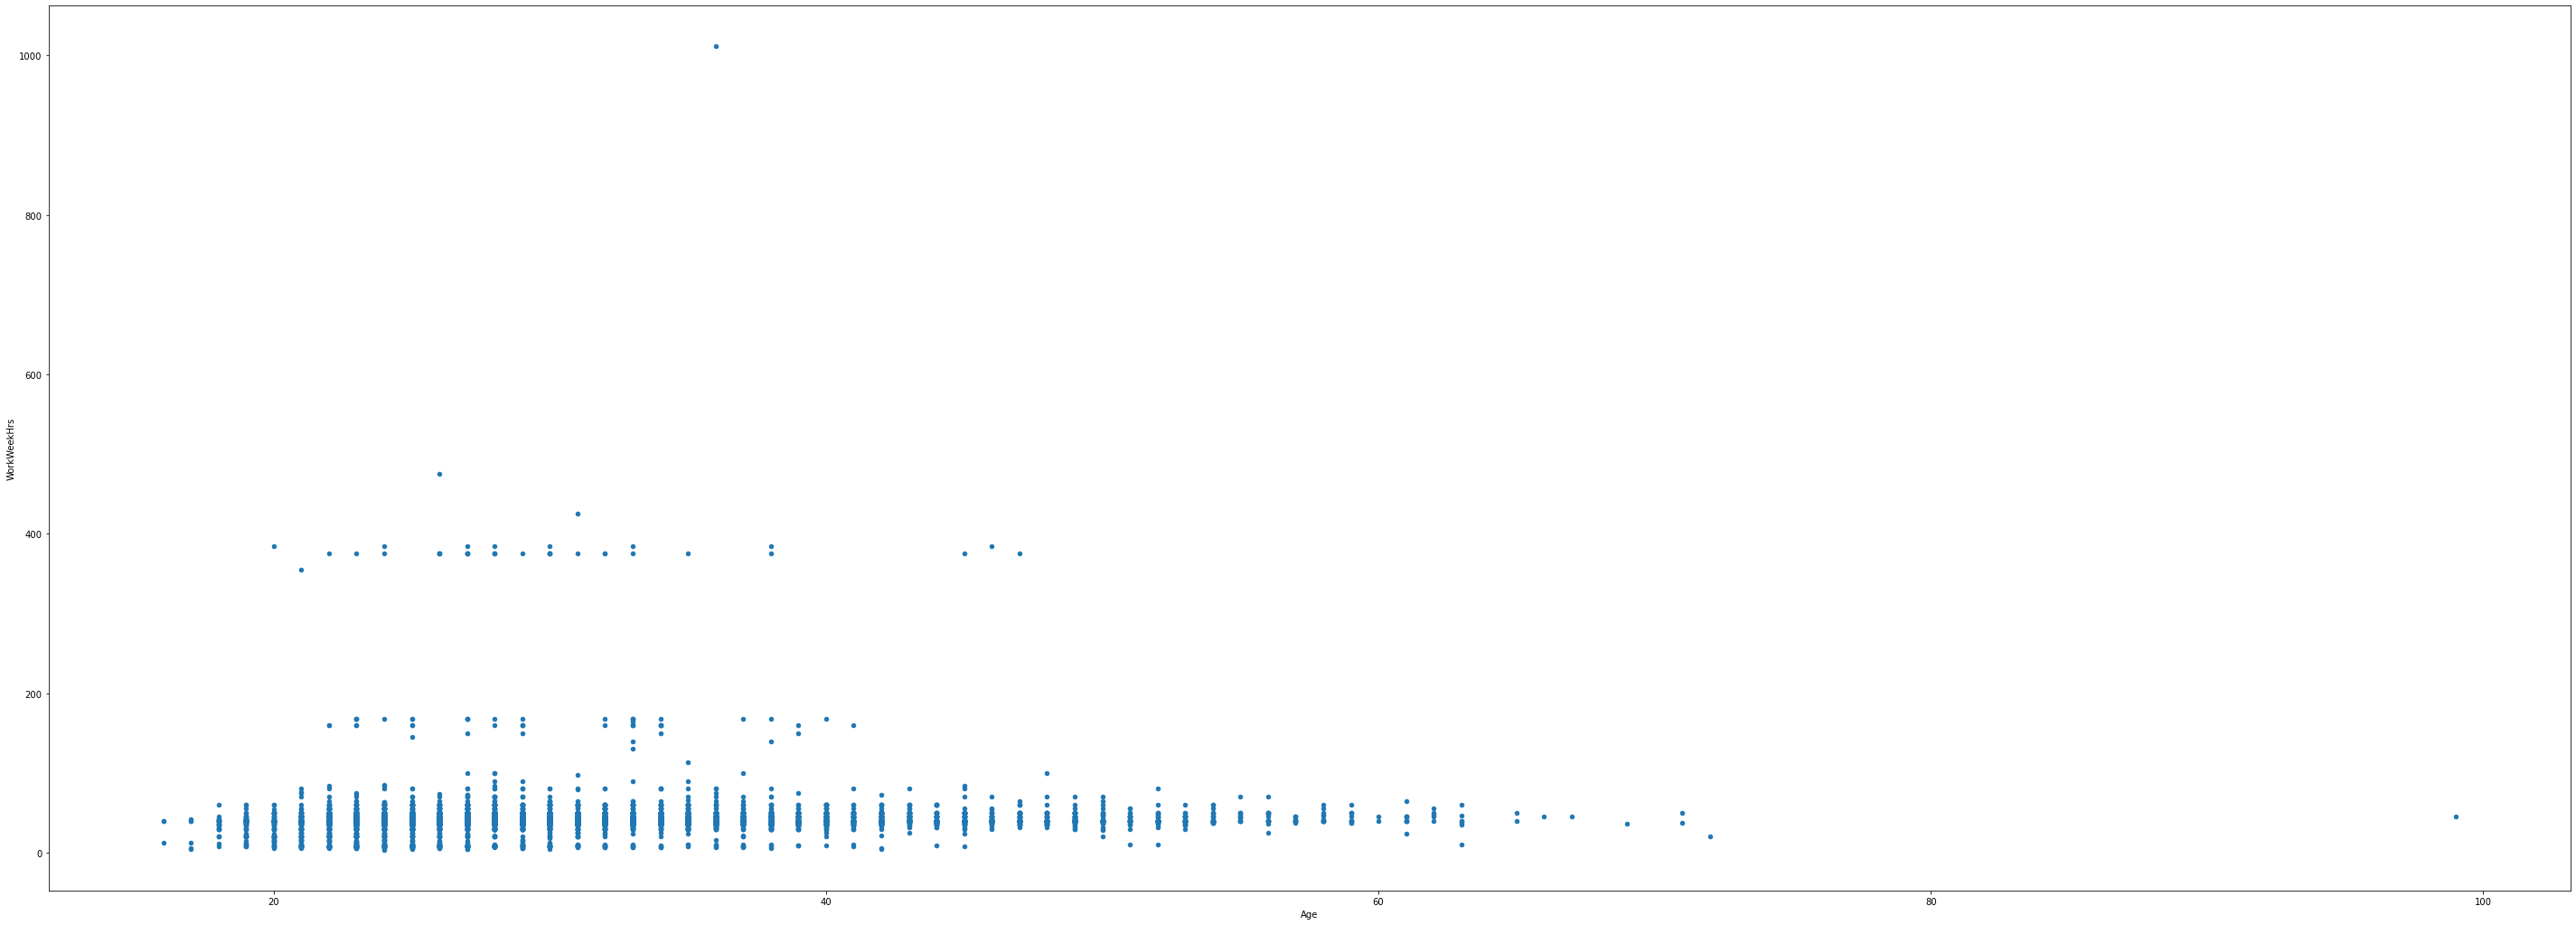

In [22]:
QUERYSc = """
SELECT Age, WorkWeekHrs FROM master
"""

df3 = pd.read_sql_query(QUERYSc,conn)
print(df3.tail())
print('\n', df3.isnull().sum(), '\n')
df3.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(50,18))



In [24]:
df3.corr()

,Age,WorkWeekHrs
Age,1.000000,0.036517
WorkWeekHrs,0.036517,1.000000


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


       WorkWeekHrs  CodeRevHrs   Age
11392         56.0        14.0  32.0
11394         40.0         5.0  25.0
11395         40.0         5.0  34.0
11396         42.5         2.0  25.0
11397         80.0         1.0  30.0

 WorkWeekHrs    0
CodeRevHrs     0
Age            0
dtype: int64 


 WorkWeekHrs    0
CodeRevHrs     0
Age            0
dtype: int64 



<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

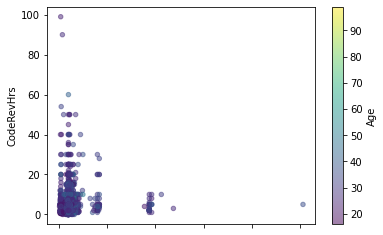

In [15]:
QUERYBub = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
"""

df4 = pd.read_sql_query(QUERYBub,conn)
df4.dropna(inplace=True)
#df_group_one = df4.groupby(['WorkWeekHrs'],as_index=False).mean()
#df_group_one
print(df4.tail())
print('\n', df4.isnull().sum(), '\n')
print('\n', df_group_one.isnull().sum(), '\n')
df4.plot(kind='scatter', x='WorkWeekHrs', y='CodeRevHrs', c='Age', alpha=0.5, colormap='viridis')
#fig = px.scatter(df4, x="WorkWeekHrs", y="CodeRevHrs", size='Age', size_max=45) 
#fig.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


   DatabaseDesireNextYear  TotalResp
0              PostgreSQL       4328
1                 MongoDB       3649
2                   Redis       3331
3                   MySQL       3281
4           Elasticsearch       2856
5    Microsoft SQL Server       2706
6                  SQLite       2437
7                Firebase       1650
8                 MariaDB       1385
9                DynamoDB       1044
10              Cassandra       1003
11                 Oracle        870
12              Other(s):        645
13              Couchbase        390

 DatabaseDesireNextYear    0
TotalResp                 0
dtype: int64 



<AxesSubplot:title={'center':'The top 5 databases that respondents wish to learn next year'}, ylabel='TotalResp'>

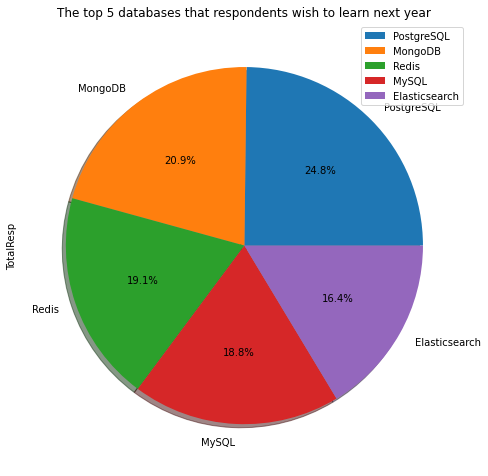

In [37]:
QUERYBub = """
SELECT DatabaseDesireNextYear, COUNT(Respondent) as TotalResp FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by TotalResp DESC
"""


df5 = pd.read_sql_query(QUERYBub,conn)
df5.dropna(inplace=True)
print(df5)
print('\n', df5.isnull().sum(), '\n')
df5.head().plot(kind='pie', y='TotalResp', figsize=(8, 10),
                            autopct='%1.1f%%', # add in percentages
                            shadow=True,       # add shadow      
                            title='The top 5 databases that respondents wish to learn next year',
                            labels=df5.DatabaseDesireNextYear.values)




In [39]:
QUERYL = """
SELECT LanguageDesireNextYear, COUNT(Respondent) as TotalResp FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by TotalResp DESC
"""


dL = pd.read_sql_query(QUERYL,conn)
dL.dropna(inplace=True)
print(dL)
"""df5.head().plot(kind='pie', y='TotalResp', figsize=(8, 10),
                            autopct='%1.1f%%', # add in percentages
                            shadow=True,       # add shadow      
                            title='The top 5 databases that respondents wish to learn next year',
                            labels=df5.DatabaseDesireNextYear.values)"""

   LanguageDesireNextYear  TotalResp
0              JavaScript       6630
1                HTML/CSS       5328
2                  Python       5239
3                     SQL       5012
4              TypeScript       4088
5                      C#       3591
6   Bash/Shell/PowerShell       3097
7                    Java       2953
8                      Go       2759
9                  Kotlin       1890
10                    C++       1633
11                   Rust       1520
12                    PHP       1457
13            WebAssembly       1397
14                  Swift       1179
15                   Ruby       1029
16                      C       1028
17                  Scala        879
18                      R        850
19              Other(s):        836
20                     F#        621
21                 Elixir        620
22                   Dart        610
23                Clojure        413
24               Assembly        336
25            Objective-C        310
2

"df5.head().plot(kind='pie', y='TotalResp', figsize=(8, 10),\n                            autopct='%1.1f%%', # add in percentages\n                            shadow=True,       # add shadow      \n                            title='The top 5 databases that respondents wish to learn next year',\n                            labels=df5.DatabaseDesireNextYear.values)"

In [40]:
QUERYLnow = """
SELECT LanguageWorkedWith, COUNT(Respondent) as TotalResp FROM LanguageWorkedWith
group by LanguageWorkedWith
order by TotalResp DESC
"""
dLnow = pd.read_sql_query(QUERYLnow,conn)
dLnow.dropna(inplace=True)
print(dLnow)

       LanguageWorkedWith  TotalResp
0              JavaScript       8687
1                HTML/CSS       7830
2                     SQL       7106
3   Bash/Shell/PowerShell       4642
4                  Python       4542
5                    Java       4506
6                      C#       4288
7              TypeScript       3232
8                     PHP       2913
9                     C++       1946
10                      C       1578
11                   Ruby       1149
12                     Go       1114
13              Other(s):        840
14                 Kotlin        751
15                  Swift        707
16                    VBA        628
17                      R        585
18            Objective-C        518
19                  Scala        492
20               Assembly        437
21                   Rust        324
22                   Dart        237
23                 Elixir        187
24                Clojure        164
25                     F#        158
2

In [44]:
QUERYDBnow="""
SELECT DatabaseWorkedWith,count(Respondent)
FROM DatabaseWorkedWith
group by Respondent having count(DatabaseWorkedWith)=1 and DatabaseWorkedWith='MySQL'"""
dDBnow = pd.read_sql_query(QUERYDBnow,conn)
dDBnow.dropna(inplace=True)
print(dDBnow)

    DatabaseWorkedWith  count(Respondent)
0                MySQL                  1
1                MySQL                  1
2                MySQL                  1
3                MySQL                  1
4                MySQL                  1
..                 ...                ...
469              MySQL                  1
470              MySQL                  1
471              MySQL                  1
472              MySQL                  1
473              MySQL                  1

[474 rows x 2 columns]


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


    Age  WorkWeekHrs  CodeRevHrs
1  31.0          8.0         3.0
2  32.0         40.0         2.0
3  33.0         40.0         2.0
4  34.0         40.0         2.0
5  35.0         38.0         2.0


<AxesSubplot:title={'center':'Medians of WorkWeekHrs & CodeRevHrs for the age group 30 to 35'}, xlabel='Age'>

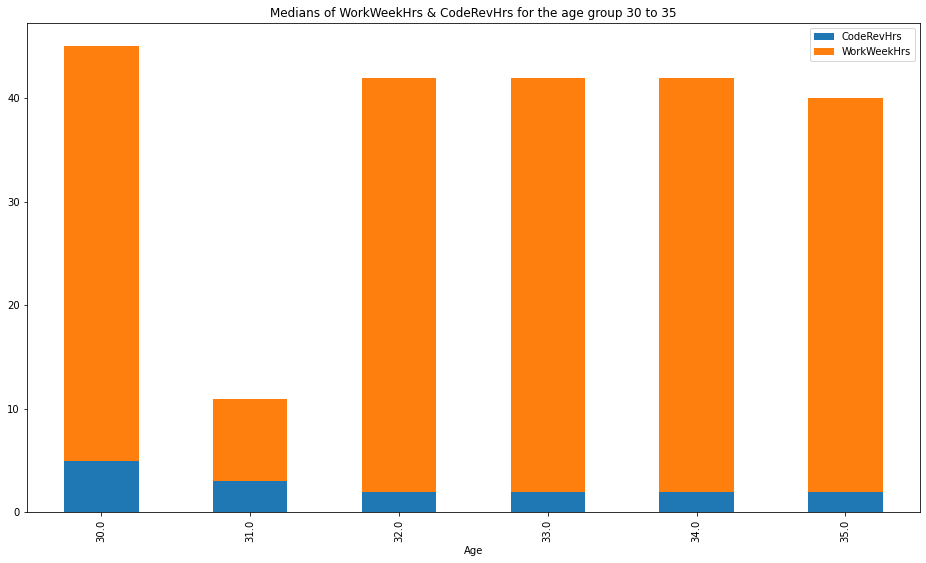

In [28]:
QUERYStk = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM master
WHERE Age >=30 AND Age <=35
group by Age
order by Age
"""

df6 = pd.read_sql_query(QUERYStk,conn)
df6.dropna(inplace=True)
print(df6.tail())
grp_med= df6.groupby(df6.Age)[['CodeRevHrs','WorkWeekHrs']].median()
grp_med.plot(kind='bar', stacked=True, figsize=(16, 9),
                            title='Medians of WorkWeekHrs & CodeRevHrs for the age group 30 to 35')



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


     Age  ConvertedComp
0   45.0        72522.0
1   46.0       118000.0
2   47.0       103000.0
3   48.0        25980.0
4   49.0       110509.0
5   50.0       115000.0
6   51.0        89212.0
7   52.0       135000.0
8   53.0       105000.0
10  55.0       150000.0
12  57.0        75431.0
13  58.0      1000000.0
14  59.0        75000.0
15  60.0       150000.0


<AxesSubplot:title={'center':'Medians of ConvertedComp for the age group 45 to 60'}, xlabel='Age'>

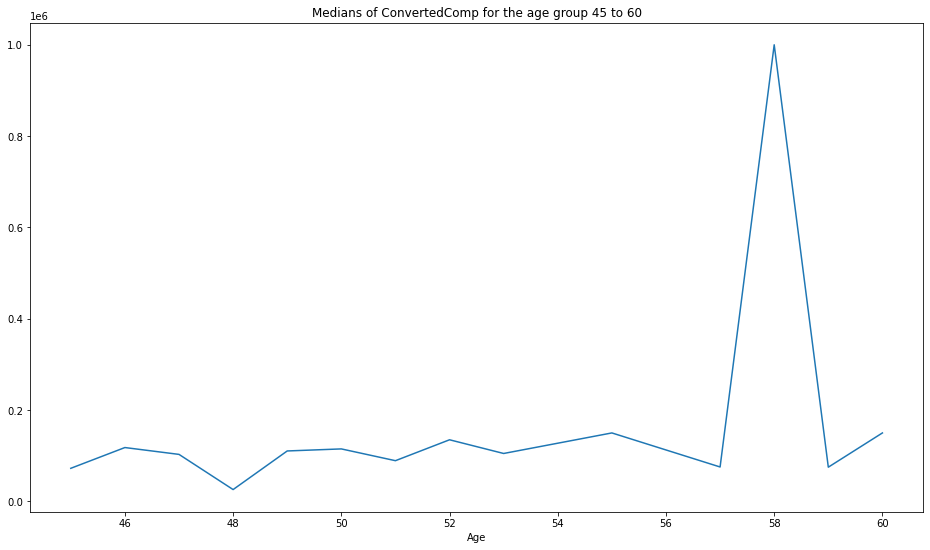

In [31]:
QUERYln = """
SELECT Age, ConvertedComp FROM master
WHERE Age >=45 AND Age <=60
group by Age
order by Age
"""

df7 = pd.read_sql_query(QUERYln,conn)
df7.dropna(inplace=True)
print(df7)
grp_med= df7.groupby(df7.Age)['ConvertedComp'].median()
grp_med.plot(kind='line', figsize=(16, 9),
                            title='Medians of ConvertedComp for the age group 45 to 60')



    Age  ConvertedComp
0  25.0         7696.0
1  26.0       455352.0
2  27.0        20623.0
3  28.0        90000.0
4  29.0        65277.0
5  30.0       110000.0


<AxesSubplot:title={'center':'Medians of ConvertedComp for the age group 25 to 30'}, xlabel='Age'>

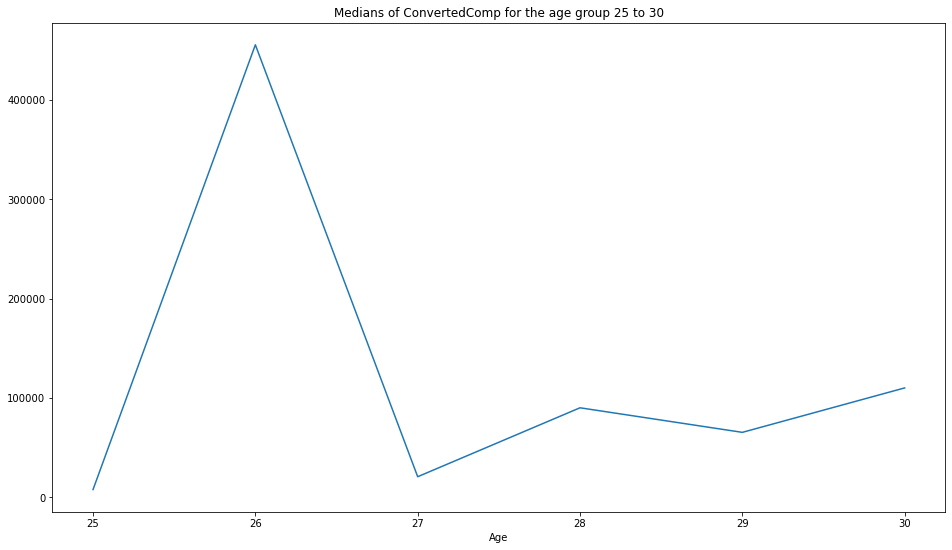

In [55]:
QUERYln2 = """
SELECT Age, ConvertedComp FROM master
WHERE Age >=25 AND Age <=30
group by Age
order by Age
"""

dfln2 = pd.read_sql_query(QUERYln2,conn)
dfln2.dropna(inplace=True)
print(dfln2)
grp_med= dfln2.groupby(dfln2.Age)['ConvertedComp'].median()
grp_med.plot(kind='line', figsize=(16, 9),
                            title='Medians of ConvertedComp for the age group 25 to 30')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:ylabel='MainBranch'>

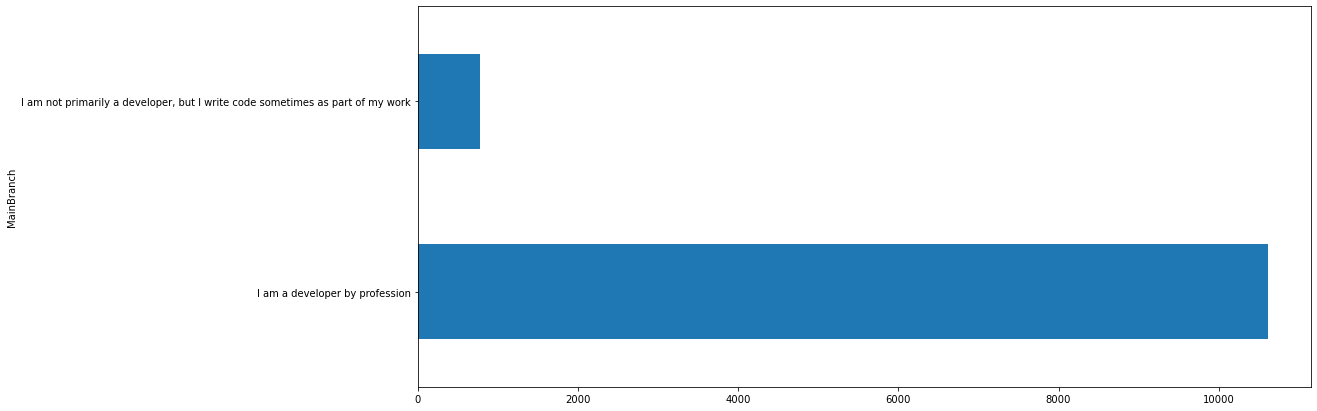

In [47]:
QUERYBarh = """
SELECT MainBranch FROM master
"""

df8 = pd.read_sql_query(QUERYBarh,conn)
df8.dropna(inplace=True)
grpMB= df8.groupby('MainBranch')['MainBranch'].count()
grpMB.plot(kind='barh', x='Total',y='MainBranch', figsize=(16, 7))



In [54]:
dev = """
SELECT DevType, Count(*) as Total FROM DevType
GROUP BY DevType
ORDER BY DevType DESC
"""

dDev = pd.read_sql_query(dev,conn)
dDev.dropna(inplace=True)
dDev
#grpMB= dDev.groupby('MainBranch')['MainBranch'].count()
#dDev.plot(kind='barh', x='Total',y='MainBranch', figsize=(16, 7))

,DevType,Count(*)
0,System administrator,1202
1,Student,766
2,Senior executive/VP,160
3,Scientist,354
4,Product manager,480
5,Marketing or sales professional,61
6,Engineering manager,386
7,"Engineer, site reliability",449
8,"Engineer, data",832
9,Educator,514


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
